In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

plt.style.use('ggplot')

## MoneyFarm: cost and gain estimation

**Moneyfarm** is a digital investment platform founded in Italy in 2011. It offers a range of investment portfolios designed to meet the needs of different types of investors, from beginners to experienced ones. Moneyfarm uses a combination of technology and human expertise to provide personalized investment advice and portfolio management. The platform offers a user-friendly interface, low fees, and a mobile app to make investing accessible and convenient for everyone. Moneyfarm is regulated by the Financial Conduct Authority (FCA) in the UK and the Consob in Italy, ensuring that it operates within strict regulatory guidelines. It has since expanded to other European countries, including the UK, Germany, and France.

Moneyfarm offers a range of investment portfolios that invest in a diversified mix of assets, including stocks, bonds, and commodities. The portfolios are designed to match different risk profiles, from conservative to aggressive, depending on an investor's individual goals and preferences. 

Moneyfarm invests primarily in **ETFs**. ETFs, or exchange-traded funds, are investment funds that trade on an exchange like a stock. ETFs are designed to *track the performance of a specific index, such as the S&P 500 or the FTSE 100*. By investing in an ETF, investors can gain exposure to a diversified portfolio of assets that mirror the performance of the underlying index.

Needless to say, Moneyfarm comes with some costs associated with the fact that they manage your money for you and handle the taxes on capital gains. Costs are publicly available on their website: [Moneyfarm costs](https://www.moneyfarm.com/it/ppc-confronta-costi/?gclid=Cj0KCQiAo-yfBhD_ARIsANr56g7pMWc23j_2IuK-5eHx05sK4AQI111QEPvIaPHW0gPwfWsPAZk7w4YaAm2NEALw_wcB).

In the following, we simply calculate these costs and the net gain, based on an hypothezied average annual capital gain, that the users can tune. We assume that the investor is investing their money on a monthly basis, and he/she may add extra liquidity to his/her portfolio as it becomes available.

In [10]:
# Defining variables

# Average annual capital gain (% on total invested money)
average_annual_gain = 0.045

# Taxes: 26% (Italy) on capital gain 
annual_tax = 0.26
bid_ask = 0.0028

# Moneyfarm cost
mf_costs = np.array([.01, 0.0075, 0.0050, 0.0040])


# Investment variables
monthly_investment = [100, 200, 500, 650]
initial_investment = 5000
year_extra_liq = 0

# Time range
years = 25

In [11]:
# Defining output variables
gain = {}
capital = {}
costs = {}

In [12]:
# Cycle over different investment scenarios
for i in monthly_investment:

    # Initialize lists with annual data: 
    year_gain = []
    year_capital = []
    year_costs = []
    
    
    tot_invested = initial_investment
    tot_net_capital = initial_investment
    
    tot_net_capital_nocost = initial_investment
    
    tot_costs = 0
    for j in range(years):
        # Updating tot_investet
        tot_invested += (i*12)+year_extra_liq
        
        # Updating net_capital for monthly investments
        tot_net_capital += (i*12)+year_extra_liq
        tot_net_capital_nocost += (i*12)+year_extra_liq
        
        # Computing net gain
        g_gain = tot_net_capital*average_annual_gain
        
        # Updating with gain
        tot_net_capital = tot_net_capital + g_gain 
        tot_net_capital_nocost = tot_net_capital_nocost + tot_net_capital_nocost*average_annual_gain
        
        # Computing moneyfarm costs
        if tot_net_capital < 19999:
            year_cost = tot_net_capital*(mf_costs[0]+bid_ask)
            tot_net_capital -= year_cost
        elif tot_net_capital >= 20000 and tot_net_capital < 199999:
            year_cost = tot_net_capital*(mf_costs[1]+bid_ask)
            tot_net_capital -= year_cost
        elif tot_net_capital >= 200000 and tot_net_capital < 499999:
            year_cost = tot_net_capital*(mf_costs[2]+bid_ask)
            tot_net_capital -= year_cost
        else:
            year_cost = tot_net_capital*(mf_costs[3]+bid_ask)
            tot_net_capital -= year_cost
            
        # 26% annual tax --> Moneyfarm adopts a fiscal regime where taxes are paid yearly    
        tot_net_capital -= g_gain*annual_tax
        
        # Computing % of total_cost over total invested
        tot_costs += year_cost + g_gain*annual_tax
        perc_costs = (tot_costs/tot_net_capital_nocost)*100
        
        # Populate lists with annual values
        year_gain.append(tot_net_capital-tot_invested)
        year_capital.append(tot_net_capital)
        year_costs.append(perc_costs)

    gain[i] = year_gain
    capital[i] = year_capital
    costs[i] = year_costs

### Net gain

Below, we plot the annual net gain over the selected time range, based on the expected average annual capital gain defined above:

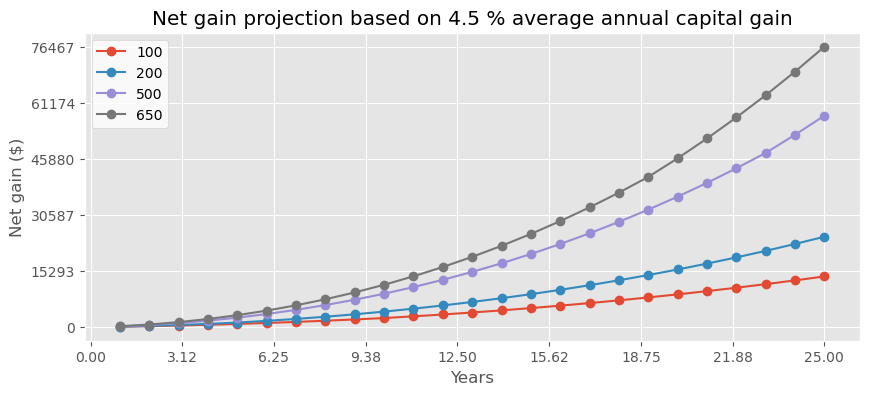

In [13]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10,4))

# Loop through the dictionary and plot each list
for key, values in gain.items():
    ax.plot(range(1, len(values)+1), values, marker='o', label=key)

# Set x and y ticks:
xticks = np.linspace(0, years, 9)
yticks = np.linspace(0, gain[list(gain.keys())[-1]][-1], 6)

plt.xticks(xticks)
plt.yticks(yticks)

# Add axis labels and a legend
ax.set_xlabel('Years')
ax.set_ylabel('Net gain ($)')
ax.set_title(f'Net gain projection based on {average_annual_gain*100} % average annual capital gain')

# Legend
legend = plt.legend()
frame = legend.get_frame()
frame.set_facecolor('white')

# Show the plot
plt.show()

In [19]:
print(gain[100][11])

3457.223182327776


Assuming an investment of **100** dollars **per month** for ten years, with an average annual gain of 4.5\%, the net gain could be approximately 3,450. This is based on a total investment of 17.000 dollars, resulting in a gain of **+20.3**\%.

### Capital evolution

Next, we plot the evolution of the (net) capital based on the average annual capital gain defined above:

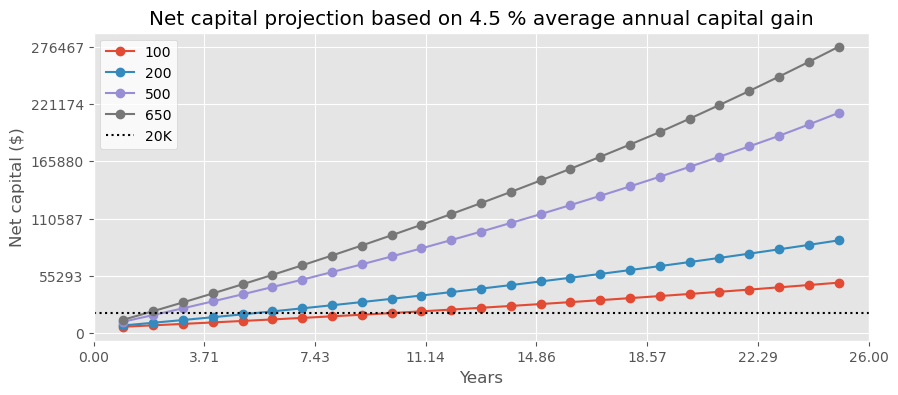

In [15]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10,4))

# Loop through the dictionary and plot each list
for key, values in capital.items():
    ax.plot(range(1, len(values)+1), values, marker='o', label=key)

# Add the '20 000$' line --> here MF commissions becomes < 1%    
ax.plot(range(0, 50), [20000 for i in range(0,50)], c='black', linestyle='dotted', label='20K')    
    
# Set x and y ticks:
xticks = np.linspace(0, years+1, 8)
yticks = np.linspace(0, capital[list(capital.keys())[-1]][-1], 6)

plt.xticks(xticks)
plt.yticks(yticks)

# Set x lim
plt.xlim(0, years+1)

# Add axis labels and a legend
ax.set_xlabel('Years')
ax.set_ylabel('Net capital ($)')
ax.set_title(f'Net capital projection based on {average_annual_gain*100} % average annual capital gain')

# Legend
legend = plt.legend()
frame = legend.get_frame()
frame.set_facecolor('white')

# Show the plot
plt.show()

### Cost evolution

Finally, we plot the evolution of costs based on the investment scenario defined above:

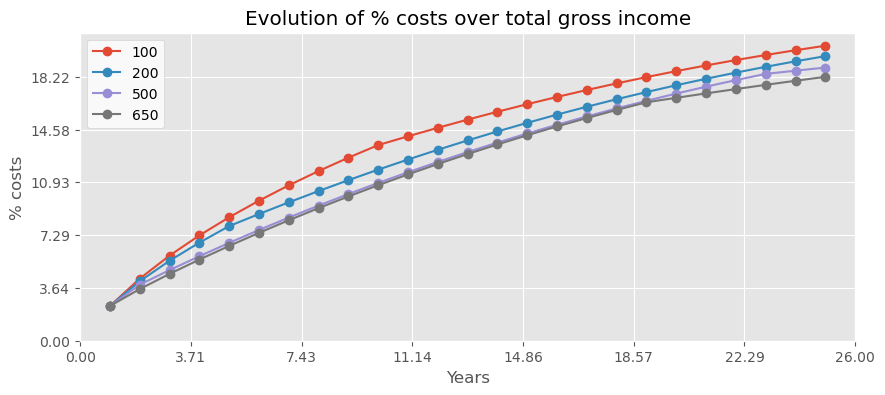

In [16]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10,4))

# Loop through the dictionary and plot each list
for key, values in costs.items():
    ax.plot(range(1, len(values)+1), values, marker='o', label=key)
       
# Set x and y ticks:
xticks = np.linspace(0, years+1, 8)
yticks = np.linspace(0, costs[list(costs.keys())[-1]][-1], 6)

plt.xticks(xticks)
plt.yticks(yticks)

# Set x lim
plt.xlim(0, years+1)

# Add axis labels and a legend
ax.set_xlabel('Years')
ax.set_ylabel('% costs')
ax.set_title(f'Evolution of % costs over total gross income')

# Legend
legend = plt.legend()
frame = legend.get_frame()
frame.set_facecolor('white')

# Show the plot
plt.show()

In [25]:
print(costs[100][24], costs[500][24])

20.36631429441544 18.85907640044498


The amount of monthly investment has a significant impact on the overall costs, mainly due to the reduction in commissions that occurs when the invested capital exceeds 20K. Investing 500 per month reaches this threshold in less time than investing 100 per month. It's worth noting that after 25 years, the percentage of costs as a proportion of total gross income can be even **1.5\% higher for those investing a smaller amount per month** (e.g. 100 versus 500).